In [1]:
# Step 1: Mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp, chi2_contingency


In [14]:
# Step 2: Load the Dataset
df = pd.read_csv('/content/drive/MyDrive/data_ndv/sales_data_sample.csv', encoding='ISO-8859-1')
df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [8]:
df.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,5/6/2005 0:00,On Hold,2,5,2005,...,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Medium


In [15]:
#Step 3: Check Columns and Data Types
print(df.columns)
df.info()



Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          282

In [16]:
# Step 4: Clean & Prepare Data
# Drop rows with missing numerical values
df = df.dropna(subset=['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP'])

# Create derived column: PROFIT (revenue - cost price approximation)
df['COST'] = df['QUANTITYORDERED'] * df['PRICEEACH']
df['PROFIT'] = df['SALES'] - df['COST']


In [17]:
#Step 5: Summary Statistics
summary_stats = df[['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP', 'COST', 'PROFIT']].agg(['mean', 'median', 'std', 'min', 'max', 'sum'])
summary_stats


,QUANTITYORDERED,PRICEEACH,SALES,MSRP,COST,PROFIT
mean,35.092809,83.658544,3.553889e+03,100.715551,2.936906e+03,6.169827e+02
median,35.000000,95.700000,3.184800e+03,99.000000,2.800000e+03,2.273737e-13
std,9.741443,20.174277,1.841865e+03,40.187912,1.105644e+03,1.047729e+03
min,6.000000,26.880000,4.821300e+02,33.000000,4.821300e+02,-9.094947e-13
max,97.000000,100.000000,1.408280e+04,214.000000,9.048160e+03,7.536500e+03
sum,99067.000000,236168.070000,1.003263e+07,284320.000000,8.290887e+06,1.741742e+06


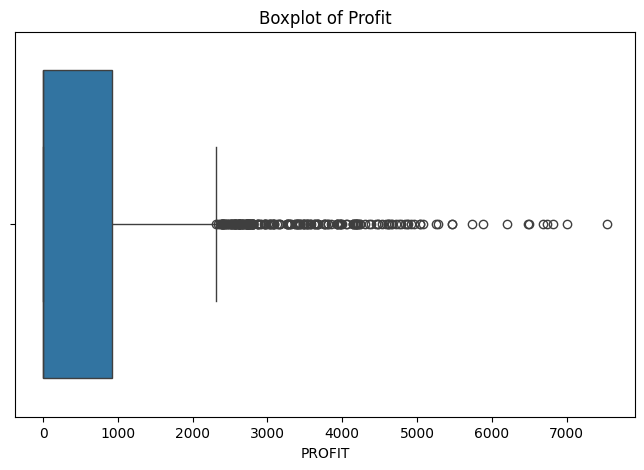

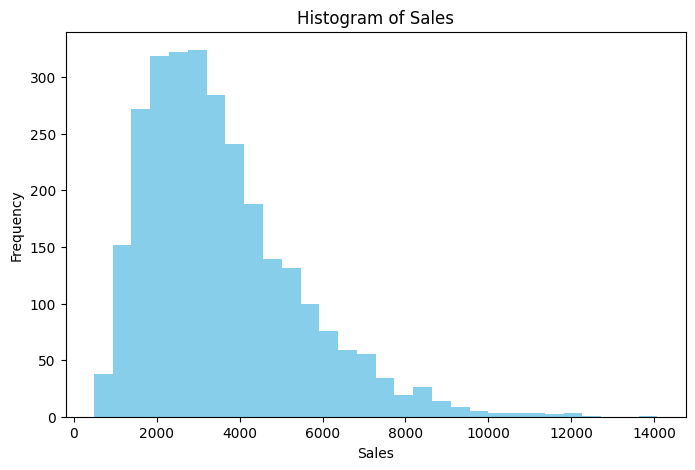

In [18]:
# Step 6: Visualizations
# Boxplot of PROFIT
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['PROFIT'])
plt.title("Boxplot of Profit")
plt.show()

# Histogram of SALES
plt.figure(figsize=(8, 5))
plt.hist(df['SALES'], bins=30, color='skyblue')
plt.title("Histogram of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()


t-statistic = 15.9779, p-value = 0.0000
Reject H₀: Mean sales is significantly different from 3000.


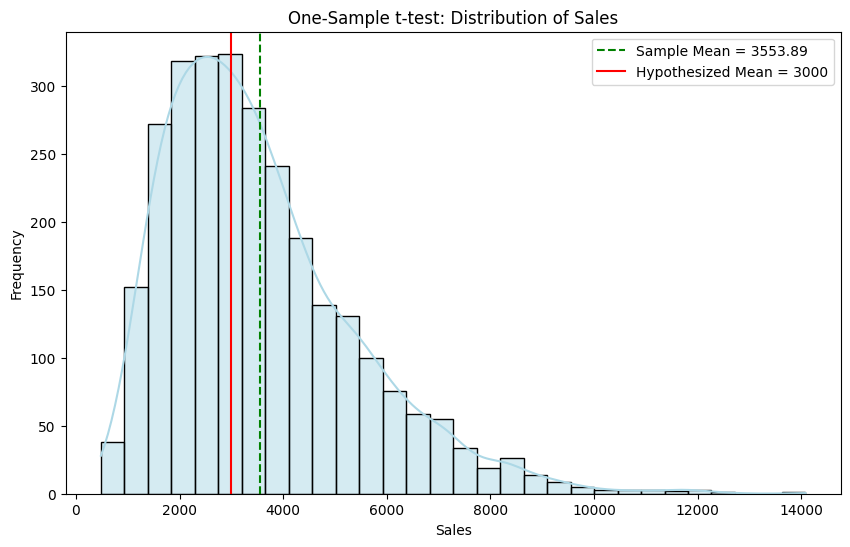

In [24]:
# Step 7: Hypothesis Test 1 – One Sample t-test
# H₀: The mean sales is $3,000
# H₁: The mean sales is different from $3,000
t_stat, p_val = ttest_1samp(df['SALES'], 3000)
print(f"t-statistic = {t_stat:.4f}, p-value = {p_val:.4f}")
if p_val < 0.05:
    print("Reject H₀: Mean sales is significantly different from 3000.")
else:
    print("Fail to reject H₀: No significant difference in mean sales.")
# Visualize the distribution of SALES with mean line and hypothesized mean (3000)
plt.figure(figsize=(10, 6))
sns.histplot(df['SALES'], kde=True, bins=30, color='lightblue')
plt.axvline(df['SALES'].mean(), color='green', linestyle='--', label=f"Sample Mean = {df['SALES'].mean():.2f}")
plt.axvline(3000, color='red', linestyle='-', label="Hypothesized Mean = 3000")
plt.title("One-Sample t-test: Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Chi-square = 135.3615, p-value = 0.0000
Reject H₀: There is a relationship between PRODUCTLINE and DEALSIZE.


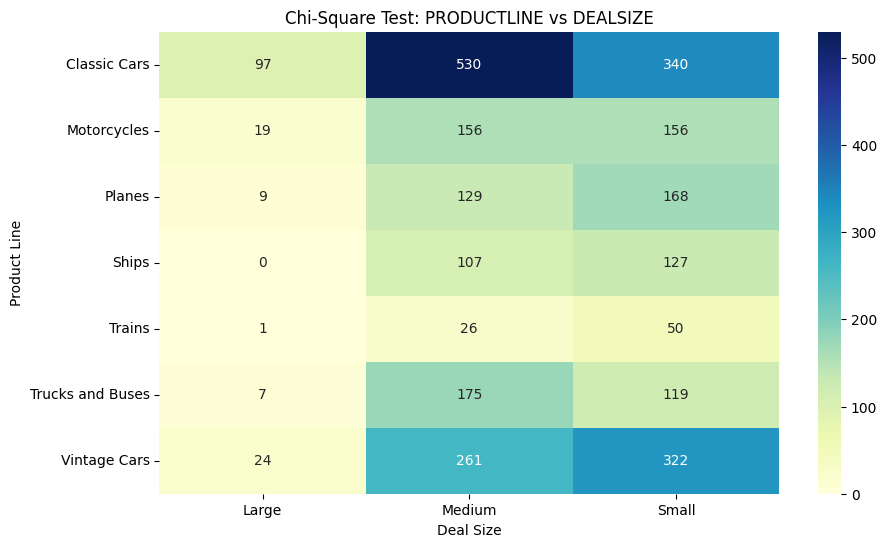

In [25]:
# Step 8: Hypothesis Test 2 – Chi-Square Test
# H₀: ProductLine and DealSize are independent
# H₁: There is an association between ProductLine and DealSize
contingency_table = pd.crosstab(df['PRODUCTLINE'], df['DEALSIZE'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square = {chi2:.4f}, p-value = {p:.4f}")
if p < 0.05:
    print("Reject H₀: There is a relationship between PRODUCTLINE and DEALSIZE.")
else:
    print("Fail to reject H₀: PRODUCTLINE and DEALSIZE are independent.")
# Visualize the contingency table as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Chi-Square Test: PRODUCTLINE vs DEALSIZE")
plt.xlabel("Deal Size")
plt.ylabel("Product Line")
plt.show()


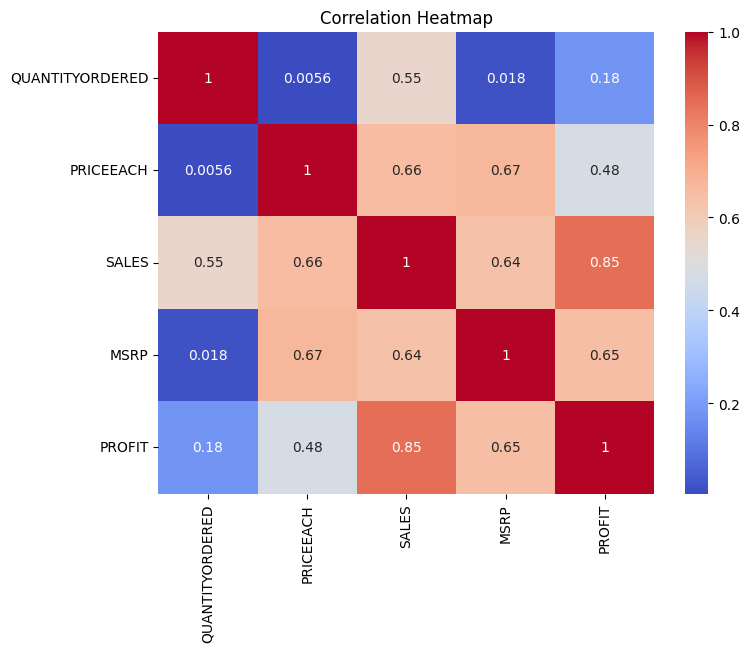

In [21]:
# Step 9: Bonus – Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP', 'PROFIT']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [22]:
# Step 10: Bonus – Pivot Table Summary
pivot = pd.pivot_table(df, values='SALES', index='PRODUCTLINE', columns='DEALSIZE', aggfunc='mean')
pivot

DEALSIZE,Large,Medium,Small
PRODUCTLINE,,,
Classic Cars,8212.801959,4585.393189,2037.398471
Motorcycles,8376.032105,4361.344167,2095.346410
Planes,8003.522222,4175.240698,2168.844167
Ships,NaN,3950.795047,2296.866614
Trains,8977.050000,4342.130769,2087.420400
Trucks and Buses,8036.580000,4668.729600,2138.706723
Vintage Cars,8711.168750,4159.156935,1889.884565


In [23]:
# Step 11: Markdown Summary
### 📊 Key Findings

# - Mean Sales was found to be significantly different from $3,000 based on a one-sample t-test (p < 0.05).
# - Chi-square test revealed a significant relationship between `PRODUCTLINE` and `DEALSIZE`.
# - Profit varied widely across records, with some products showing negative profit (potential losses).
# - Correlation heatmap shows strong positive relationship between `QUANTITYORDERED`, `SALES`, and `PROFIT`.
# - Pivot table analysis reveals which product lines perform best under different deal sizes.
